In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Regression

## Simple Linear Regression

Simple linear regression models the relationship between the magnitude of one
variable and that of a second—for example, as X increases, Y also increases. Or
as X increases, Y decreases. Correlation is another way to measure how two
variables are related. The difference is that while
correlation measures the strength of an association between two variables,
regression quantifies the nature of the relationship.

### Key Terms

- **Response**: The variable we are trying to predict.
    - _Synonyms_: dependent variable, Y-variable, target, outcome
- **Independent variable**: The variable used to predict the response.
    - _Synonyms_: independent variable, X-variable, feature, attribute
- **Record**: The vector of predictor and outcome values for a specific individual or case.
    - _Synonyms_: row, case, instance, example
- **Intercept**: The intercept of the regression line—that is, the predicted value when $X = 0$.
    - _Synonyms_: $b_0, \beta_0$
- **Regression Coefficient**: The slop of the regression line.
    - _Synonyms_: Slope, $b_1, \beta_1$, parameter estimates, weights
- **Fitted values**: The estimates obtained from the regression line.
    - _Synonyms_: predicted values
- **Residuals** The difference between the observed values and the fitted values.
    - _Synonyms_: errors
- **Least squares**: The method of fitting a regression by minimizing the sum of squared residuals.
    - _Synonyms_: ordinary least squares
    
### Regression Equation

Simple linear regression estimates exactly how much Y will change when X
changes by a certain amount. With the correlation coefficient, the variables X
and Y are interchangable. With regression, we are trying to predict the Y variable
from X using a linear relationship (i.e., a line):

\begin{equation}
Y = b_0 + b_1X
\end{equation}

We read this as "Y equals $b_1$ times X, plus a constant $b_0$ .” The symbol $b_0$ is
known as the intercept (or constant), and the symbol $b_1$ as the slope for X. Both
can be called coefficients, though in general use the term coefficient is
often reserved for $b_1$. The Y variable is known as the response or dependent
variable since it depends on X. The X variable is known as the predictor or
independent variable. The machine learning community tends to use other terms,
calling Y the target and X a feature vector.

Let's look at a synthetic example below. A dataset has been created with 100
data points, 1 feature, 1 feature being informative and one target variable.

In [11]:
x, y = make_regression(100, 1, 1, 1, noise=10)

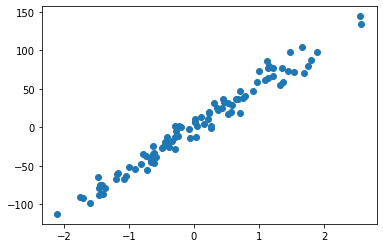

In [12]:
plt.scatter(x, y)

As you can see from the plot the X is clearly correlated with Y.
But how is Y related to X?

Simple linear regression tries to find the "best" line to predict the response Y
as a function of the predictor variable X.

\begin{equation}
Y = b_0 + b_1X
\end{equation}

We can quatify the relation ship by fitting a linear model to the data:

In [15]:
lr = LinearRegression().fit(x, y)
lr.coef_, lr.intercept_

(array([54.60028616]), 0.1436981938659867)

The intercept or $b_0$ is 0.144 and can be interpreted as the predicted Y for when X is zero.
The regression coefficient or $b_1$ can be interpreted as follows: for each additional unit of X
the value of Y increases by 54.60

In [16]:
# e.g. X = -2
y = 0.144 + 54.60 * -2
y

-109.056

In [17]:
# e.g. X = 0
y = 0.144 + 54.60 * 0
y

0.144

The regression line from this model is displayed below:

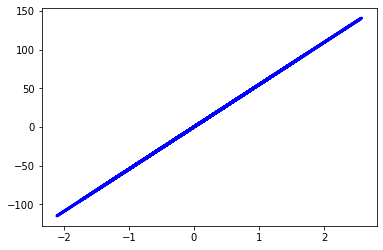

In [33]:
plt.plot(x, lr.predict(x), color='blue', linewidth=3)

The slope or $b_1$ can be calculated as: $b_1 = \Delta Y / \Delta X $ 

### Fitted Values and Residuals